In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt


c:\Users\darla\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
np.random.seed(42)
X = np.random.rand(1000, 20, 1)
y = X.sum(axis=1)     

In [3]:
split = 0.8
split_idx = int(len(X) * split)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]


In [4]:
def initialize_model():
    model = Sequential([
        LSTM(50, return_sequences=False, input_shape=(20, 1)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

model = initialize_model()
model.summary()

c:\Users\darla\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
history = model.fit(
    X_train, y_train, 
    epochs=20, 
    batch_size=32, 
    validation_split=0.2
)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 86.5806 - val_loss: 60.9645
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 32.7115 - val_loss: 13.9467
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 7.3782 - val_loss: 3.4185
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.1838 - val_loss: 1.8338
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.5158 - val_loss: 1.6750
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1.4544 - val_loss: 1.6684
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 1.4543 - val_loss: 1.6684
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 1.4548 - val_loss: 1.6684
Epoch 9/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.4544 - val_loss: 1.6682
Epoch 10/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.4552 - val_loss: 1.6681
Epoch 11/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.4540 - val_loss: 1.6680
Epoch 12/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss:

In [6]:
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2.0467 
Test Loss: 2.046668291091919


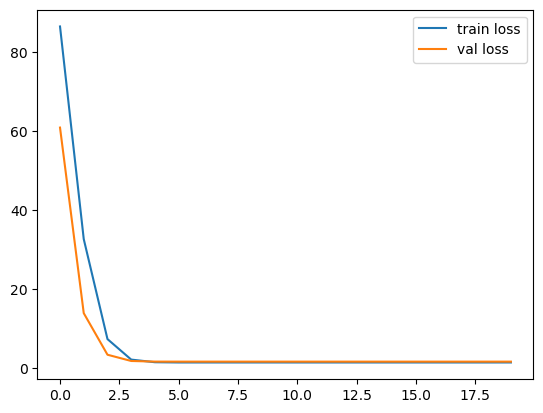

In [7]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

In [8]:
sample_idx = 0
pred = model.predict(X_test[sample_idx:sample_idx+1])
print("Séquence :", X_test[sample_idx].flatten())
print("Vrai total :", y_test[sample_idx])
print("Prédiction :", pred[0][0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
Séquence : [4.40160900e-03 3.30159259e-04 4.72263461e-01 2.92937050e-02
 9.74532554e-01 2.22065175e-01 4.72664729e-01 6.11376300e-02
 5.22048416e-01 3.79956125e-01 4.46600289e-02 3.35124267e-01
 3.91436020e-01 9.89921491e-01 2.07885872e-01 5.44779615e-01
 9.87315549e-01 7.92019208e-01 9.93367501e-01 9.68298315e-01]
Vrai total : [9.39350143]
Prédiction : 9.924899
